# Histograms from basecalled signals

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import pysam

from itertools import cycle
color_cycle = cycle(['r', 'g', 'b', 'orange'])
FS = 15 # fontsize

In [2]:
def read_fast5(fname, single_or_multi_read, get_read_ids=False):
    'from !bsc_szakdoga/github/python_scripts/fast5_analysis.ipynb'
    from ont_fast5_api.fast5_interface import get_fast5_file
    def raw_to_current(rawdata, offset, range_, digitisation):
        return list((np.array(rawdata) + offset) * range_ / digitisation)
    
    if single_or_multi_read not in ['s', 'm']:
        raise ValueError('single_or_multi variable must be "s" or "m".')
    data = []
    read_ids = []
    with get_fast5_file(fname, mode="r") as f:
        for read in f.get_reads():
            ch=read.get_channel_info()
            data.append(raw_to_current(read.get_raw_data(), ch['offset'], ch['range'], ch['digitisation']))
            if single_or_multi_read=='s':
                read_ids.append(read.read_id)
            if single_or_multi_read=='m':
                read_ids.append(read.read_id)
    if single_or_multi_read == 's':
        if get_read_ids:
            return np.array(data[0]), read_ids
        return np.array(data[0]) # single read --> dim=1
    elif single_or_multi_read == 'm':
        if get_read_ids:
            return np.array(data, dtype='object'), read_ids
        return np.array(data, dtype='object')

Number of indices in a SAM file's line: 21
- fast5 file name: index=17
- Read ID: index=0
- bases: index=9
- move table: index=11
    - sequence: .spilt(',')[2:]
    - stride: .spilt(',')[1]
- raw signal trim offset: index=19

In [1]:
# a random line in SAM file
x = ['000cbe51-4f2c-4a39-837e-83028141945e', '0', 'p300_ID3', '11', '60', '43S41M1I83M1D66M2D19M2D41M2D5M1D5M2D19M1I91M1D11M1D30M1I40M3D105M1D19M3D12M1D11M3D35M3D157M2D3M2I5M1I7M1I80M1D5M1D50M1D52M1I17M1I20M3D5M1D12M1D40M1I5M30S', '*', '0', '0', 'GCAATCCATGCTTCGTTCAGTTACGTGTGCTCTGCATATGCTGCAAATGCTGCAGGCATGGTTCCAGTTTCCATGAATCCAGGGCCCTAACATGGGACAACCGCAACCAGGAATGACTTCTAATGGCCCTCTACCTGGCCCAAGTATGATCCGTGGCAGTGTGCCAAACAGATGATGCCTCGAATAACTCCACAATCTGGTTTGAATCAATTTGGCCAGATGAGCATGGCCCAGCCCTATTGTACCCCGGCAAGCCTCCTCTTCAGCACCATGGACAGTTGGCTCAACCTGGAGCTCAACCGCCTGGGCTGTAGATGTCATGTCGCAACAGCCTTCCCAGCAGGGCCAGTTCCTTCCTCAGACTCAGTTCCCATCACAGGGAATGAATGTAACAAATATCCCTTTGGCTCCGTCCGTGGTCAAGCTCAGTGTCTCAAGCACAAATGTCTGGTTCTTCCCTGCCCGGTGAACTCTCCTATAGTGCCTCCAGGGTCTCAGAGCCACATTCACTGTCCCCAGCTTCCTCAACCAGCTCTTCATCAGAATTCACCCTCGCCTGTACCTAGTCGTACCCCCACCCCTCACCATACTCCCCCAAGCATGGGGCTCAGCAGCCACCGGCAGCAATTCCAGCCCTGTTCCTACTCCTGCCATGCCACCTGGGCCACGGTCCCAGGCTCATCCCCCTCCAAGGCAGACACCTACACCACCAACAACACAACTTCCCCAACAAGTGCAGCCTTCACTTCCTGCTGCACCTTCTGCTGACCAGCCCCAGCAGCAGCCTCGCTCGCAGCAGAGCACAGCAGCGTCTGTTCCTACCCCAGCAGCACCGCCTTCCCCTCCACCAGCCTCCCAACTCCACTTTCCCAGCCAGCTGTAAGCATTGAAGGACAGGTATCCGATCCTCCATCTACTGGTAGCACAGAAGTGAATATGAGCCATTGCTGAGAAGCAGCCTTCCCAGGAAGTGAAGATGGAGGCCAAAATGAAGTGGATCAACCAGAACCAGCAGATACTCAGCCGGAGGATGTTCCAGAGTCCTAAAGTGGAAGACTGTAAAAATGGAATCTACCGAAACAGAGAAAGCACTGAGTTAAAACTGAAATAAAAGAGGAGGAAGACCAGCCAAGTACTTCCAGCTGCTGATCATCTTGGGATCCAGTGGTGGTAA', "#&'&11.%%%$$&$(.2)&.'($$%&$0(252*)/05556-+(.34151271-+68:3..)6)2,)*;<?9:8779;..42-'&9=<8<302''*6.10&''-00(.+'624<98834:*7<>;;88;:@<<912-$&&)(...9:>;=IB>9333101124634**'79;>>;9&&.7@6--0(+4/.05:8;/>6=81>AB:>AB3:5;<?13:>=9<:@:<>:7787:>=48<5-&)*.*,145303;:;$1-4669833439;<;=<:=:2/--=?77>;B>2;=;@=*;;>,5'75.678,(-92+**0($$'(.)(((%12)99079<@;:65%-(35:;88&5*5.-/-.40,77:=-*:>>7878:>7'$899AD000;21./-666+**=98,677698?669:5,#'/6;;5619:-(*++62**(*./-5-.1/-21.&'.-+/1%156447.&((&'+./.($/2//31&&46A=:38:8=75)%2%9:5/2)3571563:963237:;=5)7:<-;<>-:?6;C1>54258=79;9687>81399+1047868<6/,,7:;;0858;8>:;8:766<8;867;38587&&(7;=;520--;<><79&*43('-%)+.6:&=@<9:;<?;8)47831.55)**??B=?<236+.%&&*9<;-',447*/;?;:45:7869;9<76;;774'/+57:>=?=5<=.:3;5349GD=9:<3>06:76:9)8;CBD;++,3'$598=<<677=@=-:+14+,+'37;:9:538989584,0;98'/,9511401.0/16277.985367<75388401%/.$$&20(/-66741-.71%%53%5..%%689;=882///474+(,&'&.7;66/6176,25:749;0,,,*)/5(&)8:5;21(4..&01&+,,)**(/$9<:+++)$$##&&*+5&)+7:60(+=8:;098=>964579>B3;75699<>:B@?6;97/-(((.,9<>??64&4-())4/(6-899511:<?;91646+63:,,>7'0+1-1::9?><C<00*68537<7566?<:695=8@?4'11389-///.-:5?9)79;8%65*333,6&*26=;@591,023+000/395*(6*812,**68>786099%*#$#570;9=;.14AA:1+$'%&%%%%$%", 'NM:i:75', 'ms:i:1811', 'AS:i:1796', 'nn:i:0', 'tp:A:P', 'cm:i:107', 's1:i:744', 's2:i:0', 'de:f:0.0526', 'rl:i:0', "mv:array('b', [5, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])", 'qs:11', 'mx:1', 'ch:81', 'rn:20907', 'st:2023-05-04T14:14:54Z', 'f5:aok310_fail_79243871_ea11eee1_24.fast5', 'ns:11838', 'ts:80', 'RG:ea11eee16ddf064fa19494bde91891ec609b0aa5_2020-07-03_dna_r9.4.1_minion_384_8cfe4e0d']

In [2]:
max_chars = 25
for i, key in enumerate(x):
    if len(key)>max_chars:
        print(f"idx={i} -- {key[:max_chars]}...")
    else:
        print(f"idx={i} -- {key}")
        

idx=0 -- 000cbe51-4f2c-4a39-837e-8...
idx=1 -- 0
idx=2 -- p300_ID3
idx=3 -- 11
idx=4 -- 60
idx=5 -- 43S41M1I83M1D66M2D19M2D41...
idx=6 -- *
idx=7 -- 0
idx=8 -- 0
idx=9 -- GCAATCCATGCTTCGTTCAGTTACG...
idx=10 -- #&'&11.%%%$$&$(.2)&.'($$%...
idx=11 -- NM:i:75
idx=12 -- ms:i:1811
idx=13 -- AS:i:1796
idx=14 -- nn:i:0
idx=15 -- tp:A:P
idx=16 -- cm:i:107
idx=17 -- s1:i:744
idx=18 -- s2:i:0
idx=19 -- de:f:0.0526
idx=20 -- rl:i:0
idx=21 -- mv:array('b', [5, 1, 0, 0...
idx=22 -- qs:11
idx=23 -- mx:1
idx=24 -- ch:81
idx=25 -- rn:20907
idx=26 -- st:2023-05-04T14:14:54Z
idx=27 -- f5:aok310_fail_79243871_e...
idx=28 -- ns:11838
idx=29 -- ts:80
idx=30 -- RG:ea11eee16ddf064fa19494...


In [4]:
def read_sam(sam_file_name):
    with open(sam_file_name, 'r') as file:
        sam_files = file.read().split('\n')
    result = []
    for i in range(len(sam_files)-1):
        sam = sam_files[i].split('\t')
        if len(sam)==31:
            read_id = sam[0]
            bases = list(sam[9]) # splitted to characters
            stride = int(sam[21].split(',')[1].split('[')[1])
            move_table = np.array(sam[21].split(',')[2:-2], dtype='int')
            fast5_file = sam[27][3:]
            trim_offset = int(sam[29][3:])
            data = {'fast5_file_name':fast5_file, 'read_id':read_id,
                    'bases':bases, 'move_table':move_table,
                    'stride': stride, 'ts':trim_offset}
            result.append(data)
    print(f'read_sam(): {len(result)} lines in the SAM file.')
    return np.array(result)


def find_read_id_index(string_list, search_string):
    string_array = np.array(string_list)
    index = np.where(np.char.find(string_array, search_string) != -1)[0]
    if len(index) == 1:
        return index[0]
    print(f'Error: no or more indices found; len(index)={len(index)}')
    return None

def split_raw_signal(raw_signal, move_table, stride):
    start_of_bases = (np.where(move_table == 1)[0]) * stride
    signals = [raw_signal[i:j] for i, j in zip(start_of_bases, start_of_bases[1:])]
    mean_signals = [np.mean(raw_signal[i:j]) for i, j in zip(start_of_bases, start_of_bases[1:])]
    return start_of_bases, signals, mean_signals

def replace_T_to_U(data):
    for record in data:
        record['bases'] = ['U' if base == 'T' else base for base in record['bases']]
    return np.array(data)

In [6]:
def clip_reads_to_region(input_file, output_file, ref_name, start, end):
    # Ágitól ()
    with pysam.AlignmentFile(input_file, "r") as infile, pysam.AlignmentFile(output_file, "w", header=infile.header) as outfile:
        for read in infile.fetch(ref_name, start, end):
            if not read.is_unmapped:
                new_seq = ''
                new_qual = ''
                ref_pos = read.reference_start
                seq_pos = 0

                for length, op in read.cigartuples:
                    if op == 0:  # Match or mismatch (M)
                        for _ in range(length):
                            if start <= ref_pos < end:
                                new_seq += read.query_sequence[seq_pos]
                                new_qual += chr(read.query_qualities[seq_pos] + 33)
                            ref_pos += 1
                            seq_pos += 1
                    elif op == 1:  # Insertion (I)
                        seq_pos += length
                    elif op == 2:  # Deletion (D)
                        ref_pos += length
                    elif op == 4:  # Soft clipping (S)
                        seq_pos += length
                    elif op == 5:  # Hard clipping (H)
                        continue
                    elif op == 6:  # Padding (P)
                        continue

                # Ensure the read spans the entire region
                if read.reference_start <= start and read.reference_end >= end:
                    if new_seq:
                        read.query_sequence = new_seq
                        read.query_qualities = new_qual
                        read.reference_start = max(read.reference_start, start)
                        outfile.write(read)
    return None

---
# Uracil

In [5]:
path_to_Uracil_sam = '/v/projects/nanopore/balazs/data/uracil_0504/'
path_to_Uracil_fast5 = '/v/projects/nanopore/agnes/signal_visualization/uracil0504/guppy/workspace/'

U_sam_files = glob(path_to_Uracil_sam+'*0.sam')
U_sam_files = sorted(U_sam_files, key=lambda x: int(re.search(r'_(\d+)_0\.sam$', x).group(1)))

#U_fast5_files = glob(path_to_Uracil_fast5+'*.fast5')

**Example**

In [6]:
# Read SAM file
data = read_sam(U_sam_files[2])
fast5_file_path = path_to_Uracil_fast5 + data[0]['fast5_file_name']
fast5_signals, read_ids = read_fast5(fast5_file_path, 'm', get_read_ids=True)

read_sam(): 3739 lines in the SAM file.


In [35]:
data = replace_T_to_U(data)

In [36]:
read_id_index = find_read_id_index(read_ids, data[0]['read_id'])

In [37]:
signal = fast5_signals[read_id_index][data[0]['ts']:]

In [38]:
start_of_bases, splitted_signal, mean_signals = split_raw_signal(signal, data[0]['move_table'], data[0]['stride'])

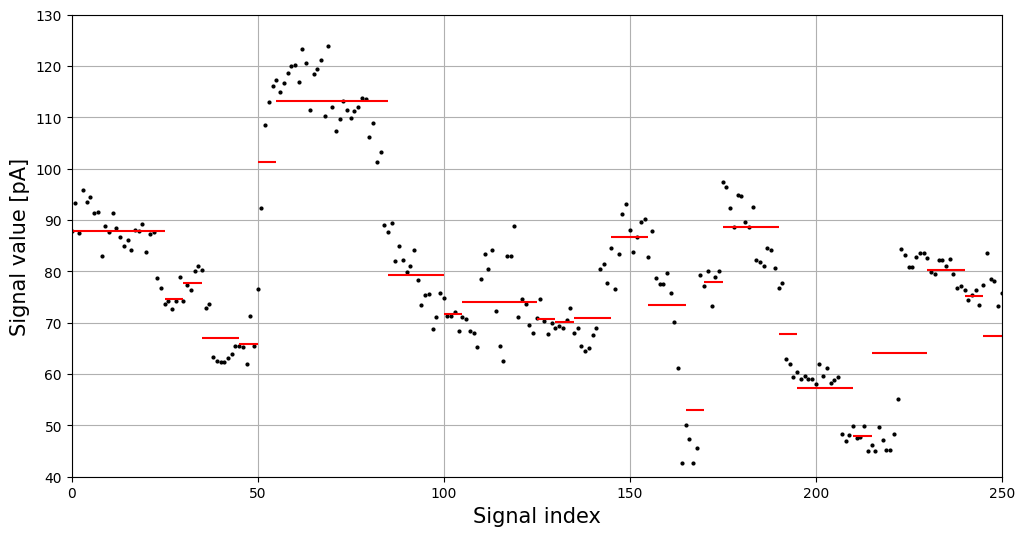

In [42]:
xlim_min, xlim_max = 0, 250

plt.figure(figsize=(12,6))
plt.xlim(xlim_min, xlim_max)
#plt.plot(signal, 'o--', color='cyan', markersize=2, linewidth=1)
plt.plot(signal, 'o', color='k', markersize=2)

plt.hlines(mean_signals, start_of_bases[:-1], start_of_bases[1:], color='red')
x = np.array([start_of_bases[:-1], start_of_bases[1:]]).mean(axis=0)
where = np.where((start_of_bases <= xlim_max) & (start_of_bases>=xlim_min))[0]
#for i in range(where[0], where[-1]):
#    plt.text(x[i]-1, mean_signals[i]+1, data[0]['bases'][i], color='red')
    
#plt.title('Part of the Dataset Uracil', fontsize=FS+3)
plt.xlabel('Signal index', fontsize=FS)
plt.ylabel('Signal value [pA]', fontsize=FS)
plt.grid()
plt.ylim(40,130)
plt.savefig('figures/signal_example.pdf', bbox_inches='tight')

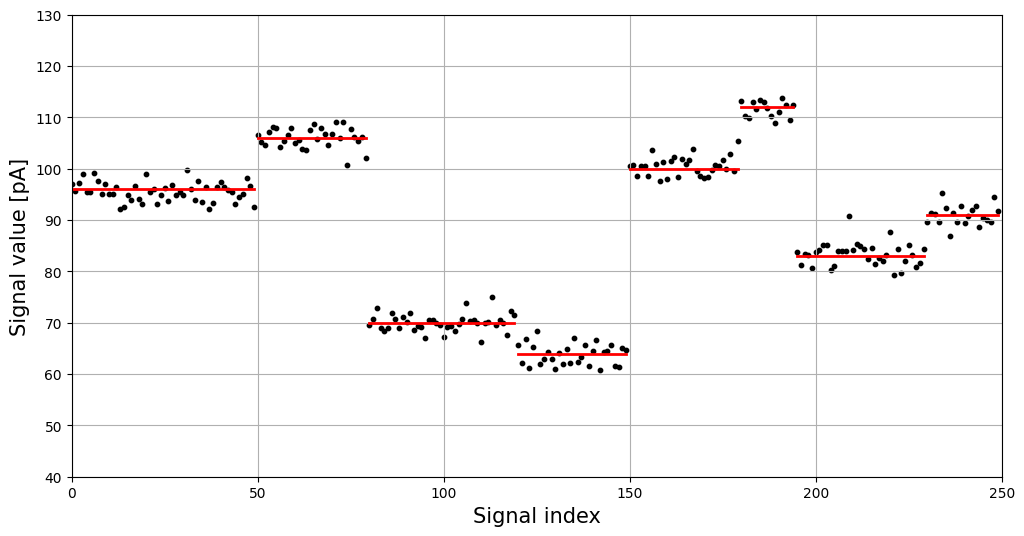

In [53]:
np.random.seed(42)
segments = [
    (0, 50, 96),
    (50, 80, 106),
    (80, 120, 70),
    (120, 150, 64),
    (150, 180, 100),
    (180, 195, 112),
    (195, 230, 83),
    (230, 250, 91)
]
n = 250
signal_sim = np.zeros(n)
for start, end, value in segments:
    signal_sim[start:end] = value

noise = np.random.normal(0, 2, n)
noisy_signal = signal_sim + noise
indices = np.arange(n)


plt.figure(figsize=(12,6))
plt.scatter(indices, noisy_signal, color='black', s=10)
for start, end, value in segments:
    plt.plot(indices[start:end], [value] * (end - start), color='red', linewidth=2)

plt.xlabel('Signal index', fontsize=FS)
plt.ylabel('Signal value [pA]', fontsize=FS)
plt.grid()
plt.ylim(40,130)
plt.xlim(0,250)
plt.savefig('figures/signal_simulation.pdf', bbox_inches='tight')
plt.show()

In [14]:
input_file = U_sam_files[0]
output_file = "../../data/uracil_0405_regions/clipped_region.sam"
ref_name = "reference_name"  # replace with your reference name
start = 1000  # replace with your start position
end = 2000    # replace with your end position

#clip_reads_to_region(input_file, output_file, ref_name, start, end)

In [ ]:
sam_file_tr =  pysam.AlignmentFile(input_file, mode="r", check_sq=False)

In [ ]:
sam_file_tr.references

In [ ]:
import pysam
import subprocess

def check_bam_file(bam_file):
    try:
        # Check if BAM file has a proper header
        header = pysam.view("-H", bam_file)
        if not header:
            print(f"Error: BAM file {bam_file} is missing a header.")
            return False

        # Check if BAM file is indexed
        if not pysam.index(bam_file):
            print(f"Indexing BAM file {bam_file}.")
            pysam.index(bam_file)
        
        # Verify the BAM file
        result = subprocess.run(["samtools", "quickcheck", bam_file], capture_output=True)
        if result.returncode != 0:
            print(f"Error: BAM file {bam_file} is corrupted or invalid.")
            return False
        
        return True
    except Exception as e:
        print(f"An error occurred: {e}")
        return False

def get_reference_names(bam_file):
    if not check_bam_file(bam_file):
        return []

    with pysam.AlignmentFile(bam_file, "r") as infile:
        references = infile.references
    return references

# Example usage:
input_bam ="/v/projects/nanopore/agnes/signal_visualization/uracil0504/guppy/pass/bam_runid_ea11eee16ddf064fa19494bde91891ec609b0aa5_0_0.bam"

ref_names = get_reference_names(input_bam)
if not ref_names:
    print("No references found or BAM file is invalid.")
else:
    print("Available reference names:", ref_names)


---
# Thymine

In [ ]:
# OLD codes
path_to_Thymine = ('/v/volumes/nanopore/timin_uracil/0421Timin/no_sample/' +
                 '20230421_1152_MC-114328_aoa546_235c7b69/fast5_pass/')
fnames_T = glob(path_to_Thymine+'*')
len_fnames_T = len(fnames_T)
len_fnames_T # more multi reads

In [ ]:
Thymine = read_fast5(fnames_T[0], 'm')
Thymine.shape